In [2]:
#loading in libraries
import pandas as pd
import numpy as np

In [4]:
#read dataset and checking first 5 roles
dataset = pd.read_csv('50_startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
#creating a statistical summary for numerical columns
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
#creating a correlation table
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
#loading in the visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
matplotlib inline

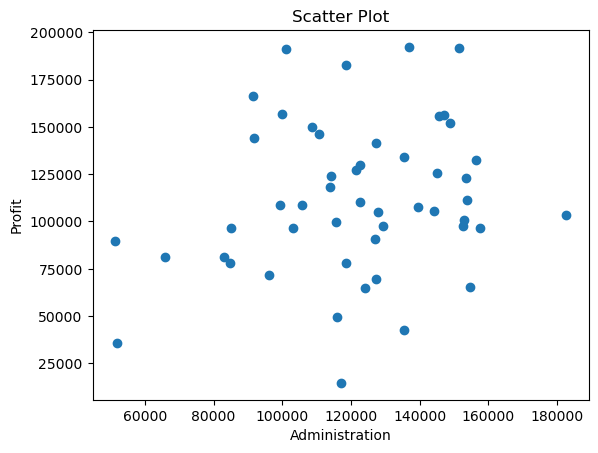

In [16]:
x= dataset['Administration']
y= dataset['Profit']
plt.scatter(x,y)
plt.title("Scatter Plot")
plt.xlabel('Administration')
plt.ylabel('Profit');

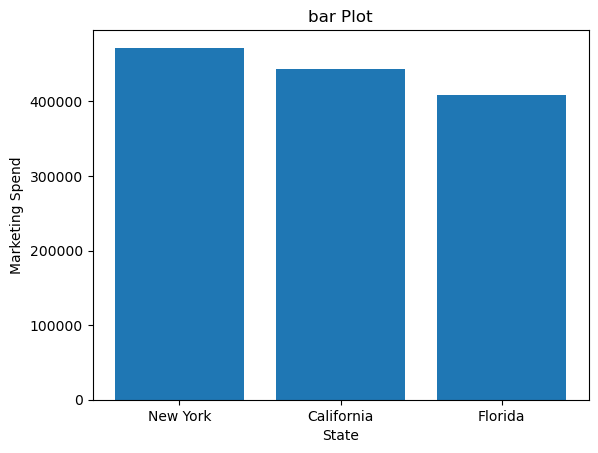

In [18]:
plt.bar(dataset['State'], dataset['Marketing Spend'])
plt.title("bar Plot")
plt.xlabel('State')
plt.ylabel('Marketing Spend');

<AxesSubplot:xlabel='Profit'>

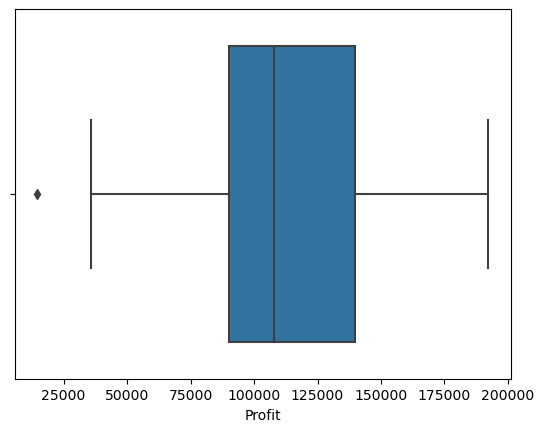

In [19]:
sns.boxplot(x='Profit', data=dataset)

<AxesSubplot:xlabel='State', ylabel='Profit'>

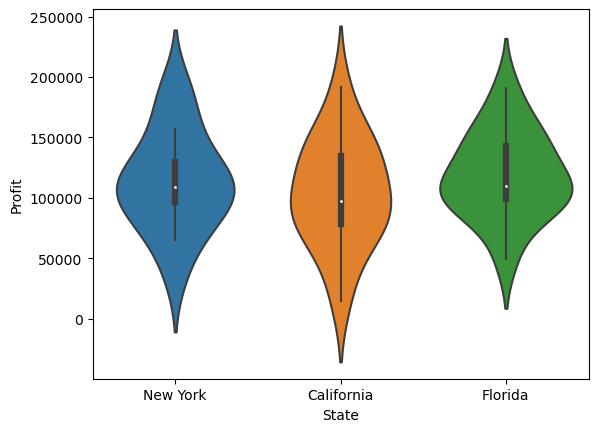

In [22]:
sns.violinplot(x='State', y='Profit', data=dataset)

<AxesSubplot:xlabel='State', ylabel='Profit'>

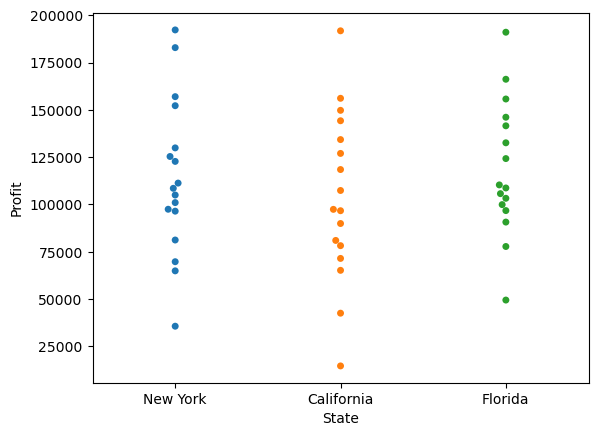

In [23]:
sns.swarmplot(x='State', y='Profit', data=dataset)

<AxesSubplot:xlabel='State', ylabel='Profit'>

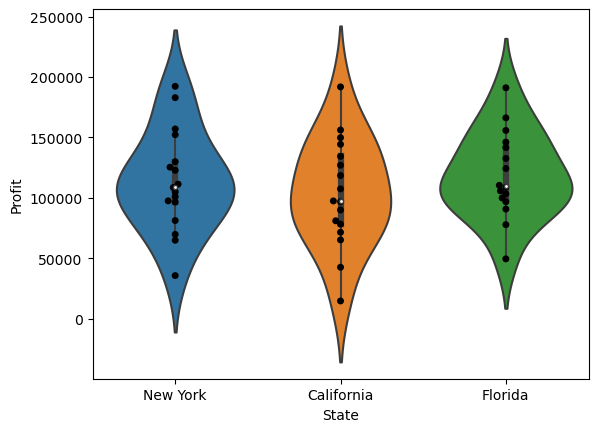

In [25]:
sns.swarmplot(x='State', y='Profit', data=dataset,color='black')
sns.violinplot(x='State', y='Profit', data=dataset)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


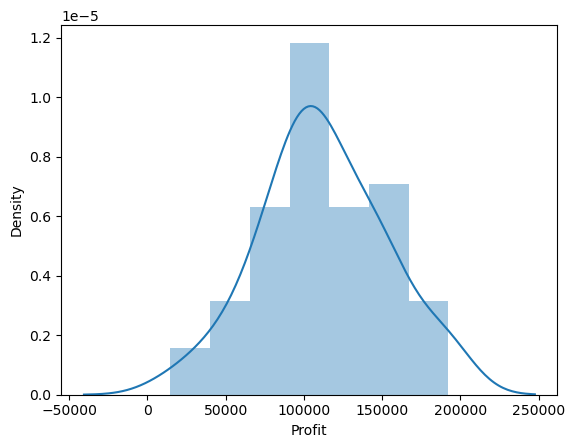

In [26]:
sns.distplot(dataset['Profit']);

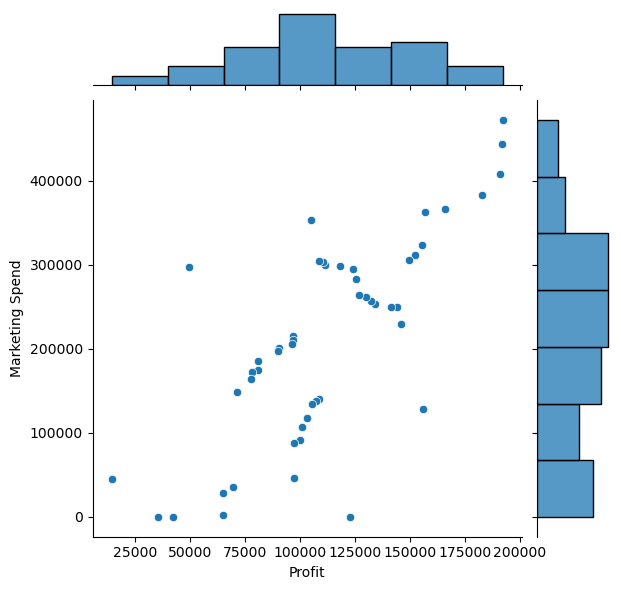

In [27]:
sns.jointplot(x='Profit', y='Marketing Spend',data=dataset)

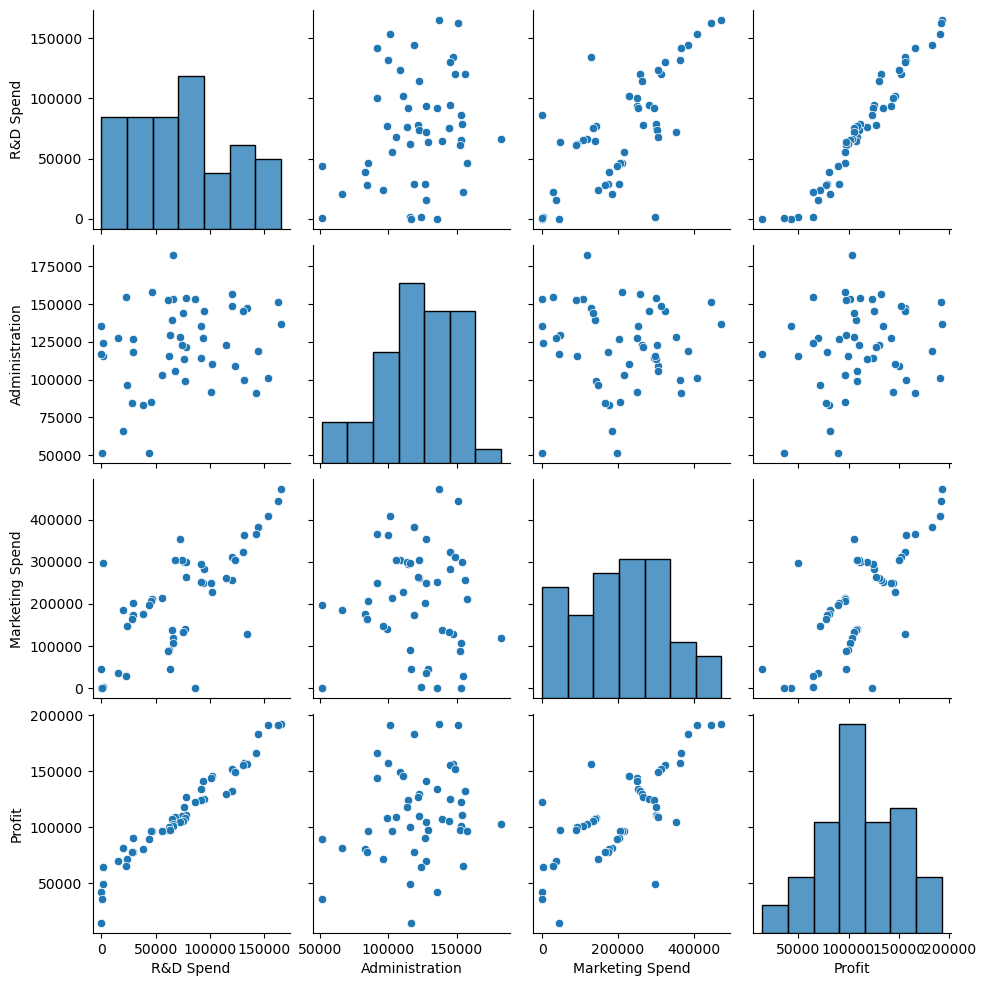

In [28]:
#Visual to see relationship between all our numerical data
sns.pairplot(data=dataset)

# End of EDA/Visualisation. Preparing data for Machine learning begins

In [29]:
#checking the data types
dataset.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [31]:
#checking for null values
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [32]:
#count the string column unique value (to know the number of state)
dataset['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [34]:
#encode the string or state column
dataset = pd.get_dummies(dataset,drop_first=True)

In [35]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [36]:
#load in the libraries needed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [37]:
#check our columns
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [38]:
#define our variables
features = ['R&D Spend', 'Administration', 'Marketing Spend',
       'State_Florida', 'State_New York']
target = ['Profit']

In [39]:
#naming our x and y
X = dataset[features]
y = dataset[target]

In [40]:
#creating a training and test set by splitiing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=123)

In [41]:
#fitting the data to our ML model
lin = LinearRegression()
lin.fit(X_train,y_train)
y_pred = lin.predict(X_test)
y_pred

array([[133749.91948852],
       [126771.56418161],
       [ 97712.50105   ],
       [ 58138.82512327],
       [128196.53673201],
       [192274.03929239],
       [ 75126.75206534],
       [127984.52000746],
       [101453.65842151],
       [151532.50862832]])

In [42]:
y_test

,Profit
10,146121.95
13,134307.35
30,99937.59
46,49490.75
18,124266.90
0,192261.83
40,78239.91
12,141585.52
29,101004.64
8,152211.77


In [44]:
#checking/evaluate the model performance
r2_score(y_test,y_pred)

0.9667998486975283

In [45]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [46]:
#inserting our prediction into the dataset
dataset.insert(4, "Predictions", lin.predict(X))
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,Predictions,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,192274.039292,0,1
1,162597.70,151377.59,443898.53,191792.06,188185.066166,0,0
2,153441.51,101145.55,407934.54,191050.39,180338.371448,1,0
3,144372.41,118671.85,383199.62,182901.99,173097.905882,0,1
4,142107.34,91391.77,366168.42,166187.94,170196.772368,1,0


In [47]:
#save as csv
dataset.to_csv('total_dataset.csv')